In [1]:
import pandas as pd
import os
import pandas
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
import sklearn.metrics as metrics



In [2]:
dataset = pd.read_csv('data.csv', sep='|')

In [ ]:
[0, 303, 332, 0, 5.23403346052241, 2, 4, 4194304, 4.864738079795604, 224, 4, 2.5509406117380085, 2.8680801108807636, 3.781308225024976]

In [49]:
features_to_keep = ['Name','DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'MajorSubsystemVersion', 'ImageBase', 'ResourcesMaxEntropy', 'SizeOfOptionalHeader', 'MajorOperatingSystemVersion', 'ResourcesMinEntropy', 'SectionsMinEntropy', 'SectionsMeanEntropy','legitimate']

# Sélectionner les colonnes spécifiées
dataset_selected = dataset.loc[:, features_to_keep]
dataset_selected.head()

,Name,DllCharacteristics,Characteristics,Machine,VersionInformationSize,SectionsMaxEntropy,Subsystem,MajorSubsystemVersion,ImageBase,ResourcesMaxEntropy,SizeOfOptionalHeader,MajorOperatingSystemVersion,ResourcesMinEntropy,SectionsMinEntropy,SectionsMeanEntropy,legitimate
0,memtest.exe,1024,258,332,16,7.221051,16,1,4194304.0,3.537939,224,0,2.568844,3.607430,5.766807,1
1,ose.exe,33088,3330,332,18,6.566909,2,5,771751936.0,5.080177,224,5,3.420744,2.373525,4.839688,1
2,setup.exe,32832,3330,332,18,7.600957,2,5,771751936.0,5.271813,224,5,2.846449,4.885191,6.409558,1
3,DW20.EXE,33088,258,332,18,7.594929,2,5,771751936.0,6.400720,224,5,2.669314,5.642565,6.641731,1
4,dwtrig20.exe,33088,258,332,18,7.608305,2,5,771751936.0,5.190603,224,5,3.421598,4.182282,6.252684,1


In [ ]:
dataset_selected = dataset_selected[(dataset_selected['legitimate'] == 0)]
dataset_selected

In [4]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

locky_files = dataset[(dataset['legitimate'] == 1)]
locky_files.head(200)


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4.194304e+06,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,5.971200e+04,1024,325120,1.268759e+05,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,7.717519e+08,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,3.558400e+04,2048,130560,3.732200e+04,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,7.717519e+08,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,2.734080e+05,21504,517120,2.844980e+05,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,7.717519e+08,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,2.078720e+05,15360,585728,2.385020e+05,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,7.717519e+08,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,1.281280e+05,2560,294912,1.353500e+05,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,4488,4096,8192,4.194304e+06,4096,512,5,0,0,0,5,0,65536,1024,57436,2,34112,1048576,4096,1048576,4096,0,16,5,4.207664,1.933161,6.785996,9.420800e+03,512,39424,9.226000e+03,272,39180,3,11,0,0,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,219331,4096,229376,4.194304e+06,4096,512,5,0,0,0,5,0,303104,1024,359472,2,33088,1048576,4096,1048576,4096,0,16,5,5.586708,4.846096,6.532661,5.795840e+04,10240,222720,5.796820e+04,10090,222255,11,250,6,0,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,587663,4096,831488,4.194304e+06,4096,512,5,0,0,0,5,0,1507328,1024,1495645,2,33088,1048576,4096,1048576,4096,0,16,5,5.266694,3.694051,6.588679,2.948096e+05,15360,823808,2.982200e+05,33448,823594,9,543,13,0,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,6751,4096,8192,4.194304e+06,4096,512,5,0,0,0,5,0,24576,1024,28316,2,33088,1048576,4096,1048576,4096,0,16,5,4.144912,0.393689,5.977442,2.252800e+03,512,4096,2.177600e+03,664,3880,3,61,0,0,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextE

In [5]:
locky_files = dataset[(dataset['legitimate'] == 0)]
locky_files.head(200)

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
41323,VirusShare_4a400b747afe6547e09ce0b02dae7f1c,4a400b747afe6547e09ce0b02dae7f1c,332,224,258,11,0,354816,257024,0,183632,4096,360448,4194304.0,4096,512,5,1,0,0,5,1,626688,1024,0,2,33088,1048576,4096,1048576,4096,0,16,5,4.590397,2.378947,6.296826,1.205248e+05,7680,354816,1.221486e+05,16468,354799,7,138,0,0,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0,0
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,12538,4096,28672,4194304.0,4096,512,4,0,6,0,4,0,241664,1024,0,2,32768,1048576,4096,1048576,4096,0,16,5,4.104541,0.000000,6.440106,6.758400e+03,0,24064,4.626080e+04,3144,154712,8,155,1,0,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15,0
41325,VirusShare_d1456165e9358b8f61f93a5f2042f39c,d1456165e9358b8f61f93a5f2042f39c,332,224,258,10,0,118784,381952,0,59914,4096,122880,4194304.0,4096,512,5,1,0,0,5,1,520192,1024,558287,2,33088,1048576,4096,1048576,4096,0,16,5,5.662408,4.183692,7.961871,1.001472e+05,9216,334848,1.015598e+05,9368,334440,7,114,0,0,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14,0
41326,VirusShare_e4214cc73afbba0f52bb72d5db8f8bb1,e4214cc73afbba0f52bb72d5db8f8bb1,332,224,258,10,0,174592,300032,0,117140,4096,180224,4194304.0,4096,512,5,1,0,0,5,1,487424,1024,513173,2,33088,1048576,4096,1048576,4096,0,16,5,5.735470,4.758260,7.364313,9.308160e+04,15360,192000,9.469880e+04,21500,191664,11,254,15,0,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14,0
41327,VirusShare_710890c07b3f93b90635f8bff6c34605,710890c07b3f93b90635f8bff6c34605,332,224,258,9,0,475648,348672,0,319769,4096,483328,4194304.0,4096,512,5,0,0,0,5,0,856064,1024,1820725856,2,33088,1048576,4096,1048576,4096,0,16,5,5.139934,4.480790,6.558149,1.648640e+05,13824,475648,1.681452e+05,30840,475580,14,421,15,0,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0,0
41328,VirusShare_3c2eb01508703752dca01957ea451a40,3c2eb01508703752dca01957ea451a40,332,224,259,9,0,157696,62464,0,67015,4096,163840,4194304.0,4096,512,5,0,0,0,5,0,233472,1024,272988,2,33024,1048576,4096,1048576,4096,0,16,4,4.819885,2.977365,6.485124,5.504000e+04,3584,157696,5.562675e+04,6700,157297,2,76,0,0,13,3.943296,1.814443,6.122045,2708.153846,132,9640,72,14,0
41329,VirusShare_3fb2d0ac00c5dff6c4fd5dfe6ba52c3f,3fb2d0ac00c5dff6c4fd5dfe6ba52c3f,332,224,259,83,82,724992,2306048,0,4243456,3522560,4308992,4194304.0,4096,4096,5,0,0,0,5,0,6709248,4096,3077047,2,32768,1048576,4096,1048576,4096,0,16,9,3.783125,0.000000,7.999518,3.367822e+05,0,1884160,7.441823e+05,2272,3061299,4,243,0,0,21,3.987463,2.642159,6.473700,14288.000000,76,270376,0,0,0
41330,VirusShare_ad1ca9a4d572c0a2793c4cea29b20887,ad1ca9a4d572c0a2793c4cea29b20887,332,224,258,10,0,120320,385024,0,61578,4096,126976,4194304.0,4096,512,5,1,0,0,5,1,528384,1024,566330,2,33088,1048576,4096,1048576,4096,0,16,5,5.646444,4.117264,7.962776,1.010688e+05,9728,330752,1.026238e+05,9404,339652,3,89,0,0,6,3.729824,2.458492,5.317552,2739.500000,48,9640,72,15,0
41331,VirusShare_7414edb3d0be66aa0816e6ed4b6b0a21,7414edb3d0be66aa0816

In [6]:
duplicat=dataset.duplicated()
print(dataset[duplicat])


Empty DataFrame
Columns: [Name, md5, Machine, SizeOfOptionalHeader, Characteristics, MajorLinkerVersion, MinorLinkerVersion, SizeOfCode, SizeOfInitializedData, SizeOfUninitializedData, AddressOfEntryPoint, BaseOfCode, BaseOfData, ImageBase, SectionAlignment, FileAlignment, MajorOperatingSystemVersion, MinorOperatingSystemVersion, MajorImageVersion, MinorImageVersion, MajorSubsystemVersion, MinorSubsystemVersion, SizeOfImage, SizeOfHeaders, CheckSum, Subsystem, DllCharacteristics, SizeOfStackReserve, SizeOfStackCommit, SizeOfHeapReserve, SizeOfHeapCommit, LoaderFlags, NumberOfRvaAndSizes, SectionsNb, SectionsMeanEntropy, SectionsMinEntropy, SectionsMaxEntropy, SectionsMeanRawsize, SectionsMinRawsize, SectionMaxRawsize, SectionsMeanVirtualsize, SectionsMinVirtualsize, SectionMaxVirtualsize, ImportsNbDLL, ImportsNb, ImportsNbOrdinal, ExportNb, ResourcesNb, ResourcesMeanEntropy, ResourcesMinEntropy, ResourcesMaxEntropy, ResourcesMeanSize, ResourcesMinSize, ResourcesMaxSize, LoadConfigurati

In [7]:

dataset.columns 

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [8]:
dataset.describe(include="all")    # summary of numeric attributes

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047,138047,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,138047.000000,1.380470e+05,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
unique,107488,138047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mshtml.dll,631ea355665f28d4707448e442fbf5b8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,2.213743e+05,5.350876e+14,7.323764e+03,694.386694,5.097843,1.092983,68.751983,64.851283,4.861895,1.444602,8.159750e+05,1297.876520,1.797959e+08,2.157403,22312.125283,9.302477e+05,5.445543e+03,1.031958e+06,3.429882e+04,3.608506e+04,7.908762e+04,4.994509,4.637599,2.259625,6.958913,1.871513e+05,1.956488e+04,6.506805e+05,1.884237e+05,2.109837e+04,6.349808e+05,5.462937,113.225648,4.338341,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,NaN,NaN,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,2.188020e+06,9.929589e+16,6.257687e+05,1289.921098,99.220192,77.551077,1185.886042,1139.691397,0.647720,181.180393,6.530065e+06,5595.523021,5.976192e+08,0.452940,15440.574817,5.550081e+05,1.804724e+04,1.817744e+05,7.906877e+06,8.904748e+06,1.466901e+07,1.915329,1.099464,1.831893,1.044297,7.735218e+06,3.540868e+05,3.007226e+07,4.180153e+06,3.543141e+05,1.285463e+07,4.362811,123.134704,34.776745,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,NaN,NaN,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,1.600000e+01,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,448.000000

### dataset.info()    # info about the whole dataset

In [9]:
dataset["legitimate"].value_counts()    # count of malware (0) and benign (1) files in dataset


legitimate
0    96724
1    41323
Name: count, dtype: int64

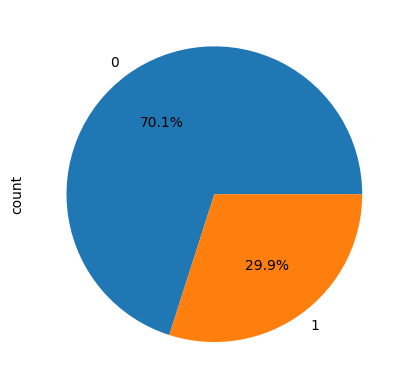

In [10]:
import matplotlib.pyplot as plt

dataset["legitimate"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [11]:
# Feature
X = dataset.drop(['Name','md5','legitimate'],axis=1).values    #Droping this because classification model will not accept object type elements (float and int only)
# Target variable
y = dataset['legitimate'].values

In [12]:
dataset1=dataset.drop(['Name','md5','legitimate'],axis=1)   #Droping this because classification model will not accept object type elements (float and int only)


In [13]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]
nbfeatures

14

In [14]:
importances=extratrees.feature_importances_
importances

array([9.14559002e-02, 4.41842378e-02, 9.82244080e-02, 5.95973561e-03,
       6.94666343e-03, 1.57110194e-03, 1.24050011e-03, 5.71086494e-04,
       1.86301354e-03, 7.73858572e-04, 1.40490727e-03, 4.96545754e-02,
       4.91355795e-03, 7.79767436e-03, 3.06027179e-02, 1.01812236e-02,
       6.51958553e-03, 2.66129965e-03, 4.99274397e-02, 4.06965932e-03,
       1.10655830e-03, 3.62008336e-03, 8.26766824e-03, 5.28713051e-02,
       1.68272948e-01, 1.45676127e-02, 1.81058231e-03, 1.64035536e-03,
       3.16997076e-04, 4.93246562e-06, 5.13231710e-05, 1.04881945e-02,
       2.19364798e-02, 2.34448075e-02, 6.45372629e-02, 1.21993157e-03,
       2.14205770e-03, 1.33893012e-03, 1.13624250e-03, 1.83978900e-03,
       1.27034026e-03, 7.05257879e-03, 4.60521911e-03, 2.43522114e-03,
       2.02836901e-03, 2.00103922e-03, 8.75171454e-03, 2.62567287e-02,
       4.65396398e-02, 1.31753634e-03, 1.83259447e-02, 1.22322055e-03,
       6.89331664e-03, 7.01619232e-02])

In [15]:
#splitting the data (70% - training and 30% - testing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.29, stratify = y)


In [16]:
features = []

# Utilisation de l'index préalablement calculé
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+index[f]])  # Utilisation de l'index pour sélectionner les noms des fonctionnalités

print(features)

1. feature DllCharacteristics (0.168273)
2. feature Characteristics (0.098224)
3. feature Machine (0.091456)
4. feature VersionInformationSize (0.070162)
5. feature SectionsMaxEntropy (0.064537)
6. feature Subsystem (0.052871)
7. feature MajorSubsystemVersion (0.049927)
8. feature ImageBase (0.049655)
9. feature ResourcesMaxEntropy (0.046540)
10. feature SizeOfOptionalHeader (0.044184)
11. feature MajorOperatingSystemVersion (0.030603)
12. feature ResourcesMinEntropy (0.026257)
13. feature SectionsMinEntropy (0.023445)
14. feature SectionsMeanEntropy (0.021936)
['DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'MajorSubsystemVersion', 'ImageBase', 'ResourcesMaxEntropy', 'SizeOfOptionalHeader', 'MajorOperatingSystemVersion', 'ResourcesMinEntropy', 'SectionsMinEntropy', 'SectionsMeanEntropy']


In [17]:
index


array([24,  2,  0, 53, 34, 23, 18, 11, 48,  1, 14, 47, 33, 32])

In [18]:
print(features)

['DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'MajorSubsystemVersion', 'ImageBase', 'ResourcesMaxEntropy', 'SizeOfOptionalHeader', 'MajorOperatingSystemVersion', 'ResourcesMinEntropy', 'SectionsMinEntropy', 'SectionsMeanEntropy']


In [19]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import sklearn.ensemble as ske
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Définir les modèles
model = {
    "RandomForest": ske.RandomForestClassifier(n_estimators=50),
    "GradientBoosting": ske.GradientBoostingClassifier(n_estimators=50),
    
 
}

In [20]:
from sklearn.metrics import confusion_matrix

# Initialiser les dictionnaires pour stocker les résultats
results = {}
predictions = {}
probabilities = {}

# Pour chaque algorithme dans vos modèles
for algo, clf in model.items():
    # Entraîner le modèle
    clf.fit(X_train, y_train)
    
    # Prédire les étiquettes des données de test
    y_pred = clf.predict(X_test)
    
    # Prédire les probabilités des données de test
    y_proba = clf.predict_proba(X_test)
    
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Afficher la matrice de confusion
    print(f"{algo}:")
    print("Confusion Matrix:")
    print(cm)
    
    # Compter le nombre de prédictions de classe 0 et de classe 1
    count_class_0 = sum(y_pred == 0)
    count_class_1 = sum(y_pred == 1)
    
    # Afficher le nombre de prédictions de classe 0 et de classe 1
    print("Nombre de prédictions de classe 0:", count_class_0)
    print("Nombre de prédictions de classe 1:", count_class_1)
    
    # Calculer les différentes métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Afficher les métriques
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Stocker les résultats
    results[algo] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    predictions[algo] = y_pred
    probabilities[algo] = y_proba


RandomForest:
Confusion Matrix:
[[27922   128]
 [  100 11884]]
Nombre de prédictions de classe 0: 28022
Nombre de prédictions de classe 1: 12012
Accuracy: 0.9943048408852475
Precision: 0.9893439893439894
Recall: 0.9916555407209613
F1 Score: 0.9904984164027338
GradientBoosting:
Confusion Matrix:
[[27878   172]
 [  244 11740]]
Nombre de prédictions de classe 0: 28122
Nombre de prédictions de classe 1: 11912
Accuracy: 0.9896088324923815
Precision: 0.9855607790463399
Recall: 0.9796395193591455
F1 Score: 0.9825912286575158


In [21]:
# Vérifier si 'Accuracy' existe dans chaque élément de results avant d'essayer de l'obtenir
winner = max(results, key=lambda x: results[x]['Accuracy'])
print("Using", winner, "for classification, with", len(features), 'features.')

Using RandomForest for classification, with 14 features.


In [22]:
joblib.dump(model[winner],'classifier.pkl')
open('features.pkl', 'wb').write(pickle.dumps(features))

299

In [23]:
# Load classifier
clf = joblib.load('classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('features.pkl'),'rb').read())
features

['DllCharacteristics',
 'Characteristics',
 'Machine',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'Subsystem',
 'MajorSubsystemVersion',
 'ImageBase',
 'ResourcesMaxEntropy',
 'SizeOfOptionalHeader',
 'MajorOperatingSystemVersion',
 'ResourcesMinEntropy',
 'SectionsMinEntropy',
 'SectionsMeanEntropy']

In [28]:
import numpy as np
import joblib
import pickle
import os

# Charger le classifieur
clf = joblib.load('classifier.pkl')

# Charger les caractéristiques
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

print(features)
# Préparer les caractéristiques pour la prédiction
values = [
    33088,        # DllCharacteristics
    3330,         # Characteristics
    332,          # Machine
    18,           # VersionInformationSize
    6.566909,     # SectionsMaxEntropy
    2,            # Subsystem
    5,            # MajorSubsystemVersion
    771751936.0,  # ImageBase
    5.080177,     # ResourcesMaxEntropy
    224,          # SizeOfOptionalHeader
    5,            # MajorOperatingSystemVersion
    3.420744,     # ResourcesMinEntropy
    2.373525,     # SectionsMinEntropy
    4.839688,     # SectionsMeanEntropy
]

values2=[0, 332, 303, 5.23403346052241, 0, 2, 4, 4194304, 2.5509406117380085, 4.864738079795604, 1048576, 224, 4]


# Faire la prédiction
prediction = clf.predict([values])

# Afficher la prédiction
print(f"La prédiction pour les caractéristiques fournies est: {prediction[0]}")


['DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'MajorSubsystemVersion', 'ImageBase', 'ResourcesMaxEntropy', 'SizeOfOptionalHeader', 'MajorOperatingSystemVersion', 'ResourcesMinEntropy', 'SectionsMinEntropy', 'SectionsMeanEntropy']
La prédiction pour les caractéristiques fournies est: 1


In [1]:
%%writefile malware_test.py
"""
this file extracts the required information of a given file using the library PE 

"""

import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse



def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1
    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x*math.log(p_x, 2)
    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res

#extract the info for a given file
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)   
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)  
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res


if __name__ == '__main__':

    

    
    clf = joblib.load('classifier.pkl')
    features = pickle.loads(open(os.path.join('features.pkl'),'rb').read())
    data = extract_infos(sys.argv[1])
    pe_features = list(map(lambda x:data[x], features))
    print(pe_features)
    prediction = clf.predict([pe_features])[0]
    probability = clf.predict_proba([pe_features])[0][prediction]
    print ('The file %s is %s with a probability of %.2f and predicted class %d' % (os.path.basename(sys.argv[1]), ['legitimate', 'malware'][prediction], probability, prediction))



Overwriting malware_test.py


In [12]:
%run malware_test.py PackingData/upx_aatools_setup.exe

FileNotFoundError: [Errno 2] No such file or directory: 'PackingData/upx_aatools_setup.exe'